## Leandro Balta Braga - 2022004260  ##
## Rafael Curiel Monteiro - 2022010624 ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
df= pd.read_csv("cost_of_living_us.csv", encoding ='latin-1')
df

case_id state  isMetro            areaname          county  \
0            1    AL     True  Montgomery, AL MSA  Autauga County   
1            1    AL     True  Montgomery, AL MSA  Autauga County   
2            1    AL     True  Montgomery, AL MSA  Autauga County   
3            1    AL     True  Montgomery, AL MSA  Autauga County   
4            1    AL     True  Montgomery, AL MSA  Autauga County   
...        ...   ...      ...                 ...             ...   
31425     3171    WY    False   Weston County, WY   Weston County   
31426     3171    WY    False   Weston County, WY   Weston County   
31427     3171    WY    False   Weston County, WY   Weston County   
31428     3171    WY    False   Weston County, WY   Weston County   
31429     3171    WY    False   Weston County, WY   Weston County   

      family_member_count  housing_cost    food_cost  transportation_cost  \
0                    1p0c    8505.72876   3454.91712          10829.16876   
1                    1p1c   12067.50240   5091.70788          11588.19288   
2                    1p2c   12067.50240   7460.20308          12361.77720   
3                    1p3c   15257.15040   9952.23924          13452.18600   
4                    1p4c   15257.15040  12182.21400          13744.59840   
...                   ...           ...          ...                  ...   
31425                2p0c    8316.00000   6010.65672          14790.36240   
31426                2p1c   10956.00000   7480.86696          15611.58600   
31427                2p2c   10956.00000   9474.35748          16163.90280   
31428                2p3c   13632.00000  11567.46972          17118.38400   
31429                2p4c   13632.00000  14155.81080          17184.34920   

       healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0           5737.47984              4333.81344          0.0000   6392.94504   
1           8659.55640              6217.45896       6147.8298   7422.07836   
2          11581.63260              7075.65816      15824.6940   9769.56228   
3          14503.70760              9134.35620      18802.1892  13101.70320   
4          17425.78560              9942.36396      18802.1892  13469.21880   
...                ...                     ...             ...          ...   
31425      14466.55920              5191.11288          0.0000   6640.77324   
31426      18086.24160              6680.40384       8675.8770   7933.21068   
31427      21705.92280              7402.72416      21207.6984   9502.56228   
31428      25325.60400              9130.76148      25063.6440  11456.36724   
31429      28945.28640             10068.61968      25063.6440  11484.86724   

        total_cost  median_family_income  
0       39254.0532          73010.414062  
1       57194.3256          73010.414062  
2       76141.0308          73010.414062  
3       94203.5328          73010.414062  
4      100823.5200          73010.414062  
...            ...                   ...  
31425   55415.4672          80177.656250  
31426   75424.1832          80177.656250  
31427   96413.1684          80177.656250  
31428  113294.2260          80177.656250  
31429  120534.5760          80177.656250  

[31430 rows x 15 columns]

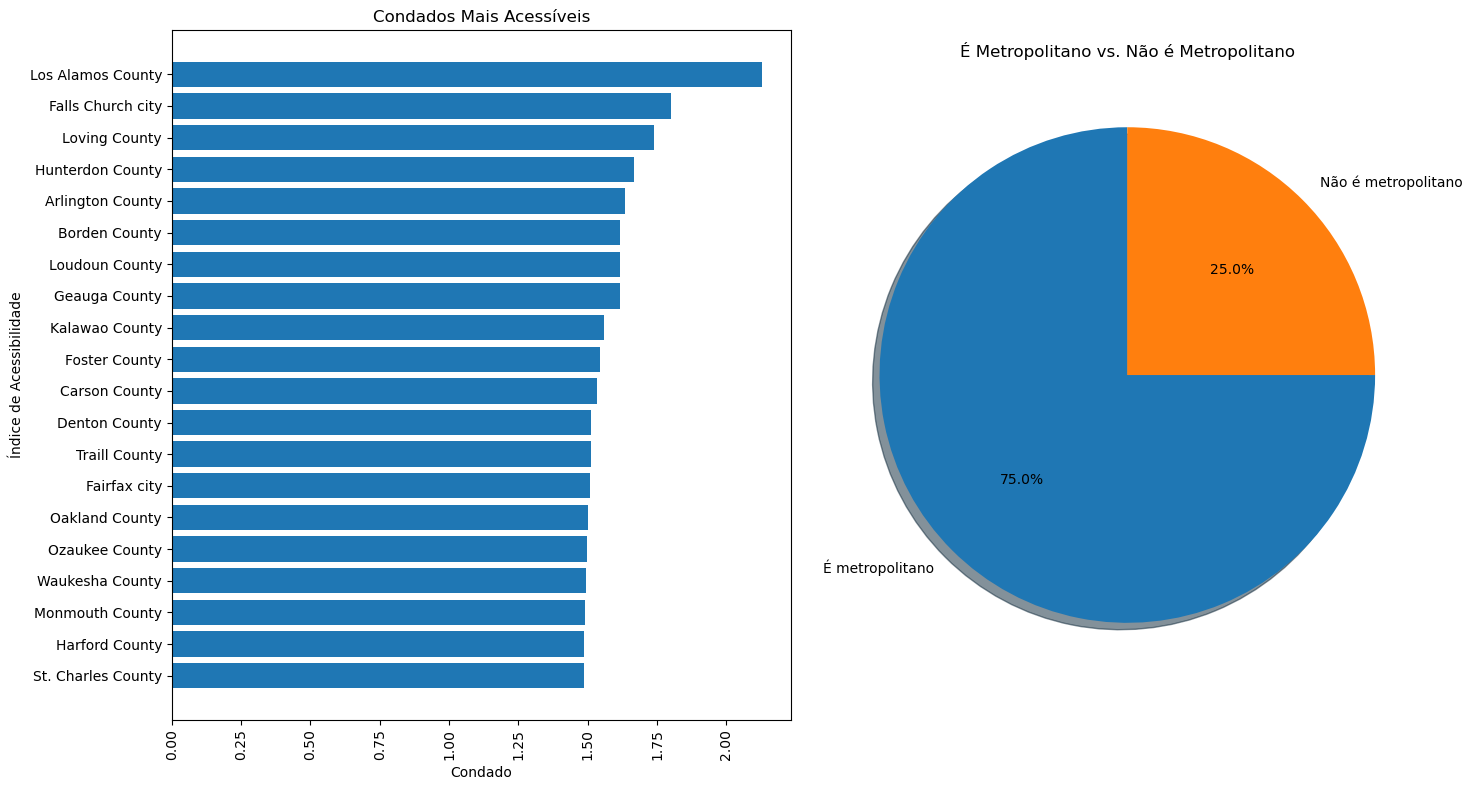

In [3]:
# Calculando e criando o Índice de Acessibilidade
df['affordability_index'] = (df['median_family_income'] / df['total_cost'])

# Ordenando os condados por nível de acessibilidade
dataAcess = df.groupby("county")[["affordability_index", 'isMetro']].mean().reset_index().sort_values(by='affordability_index', ascending=False)
dataAcess = dataAcess.head(20)
dataAcess = dataAcess.sort_values(by="affordability_index", ascending=True)

# Criando um grid de subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Primeiro subplot
axes[0].barh(dataAcess['county'], dataAcess['affordability_index'])
axes[0].set_title("Condados Mais Acessíveis")
axes[0].set_xlabel("Condado")
axes[0].set_ylabel("Índice de Acessibilidade")
axes[0].tick_params(axis='x', rotation=90)

# Segundo subplot
df3 = dataAcess[dataAcess['isMetro'] == True]
eMetro = len(df3)
df4 = dataAcess[dataAcess['isMetro'] == False]
nMetro = len(df4)

labels = 'É metropolitano', 'Não é metropolitano'
axes[1].pie([eMetro, nMetro], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("É Metropolitano vs. Não é Metropolitano")

plt.tight_layout()
plt.show()

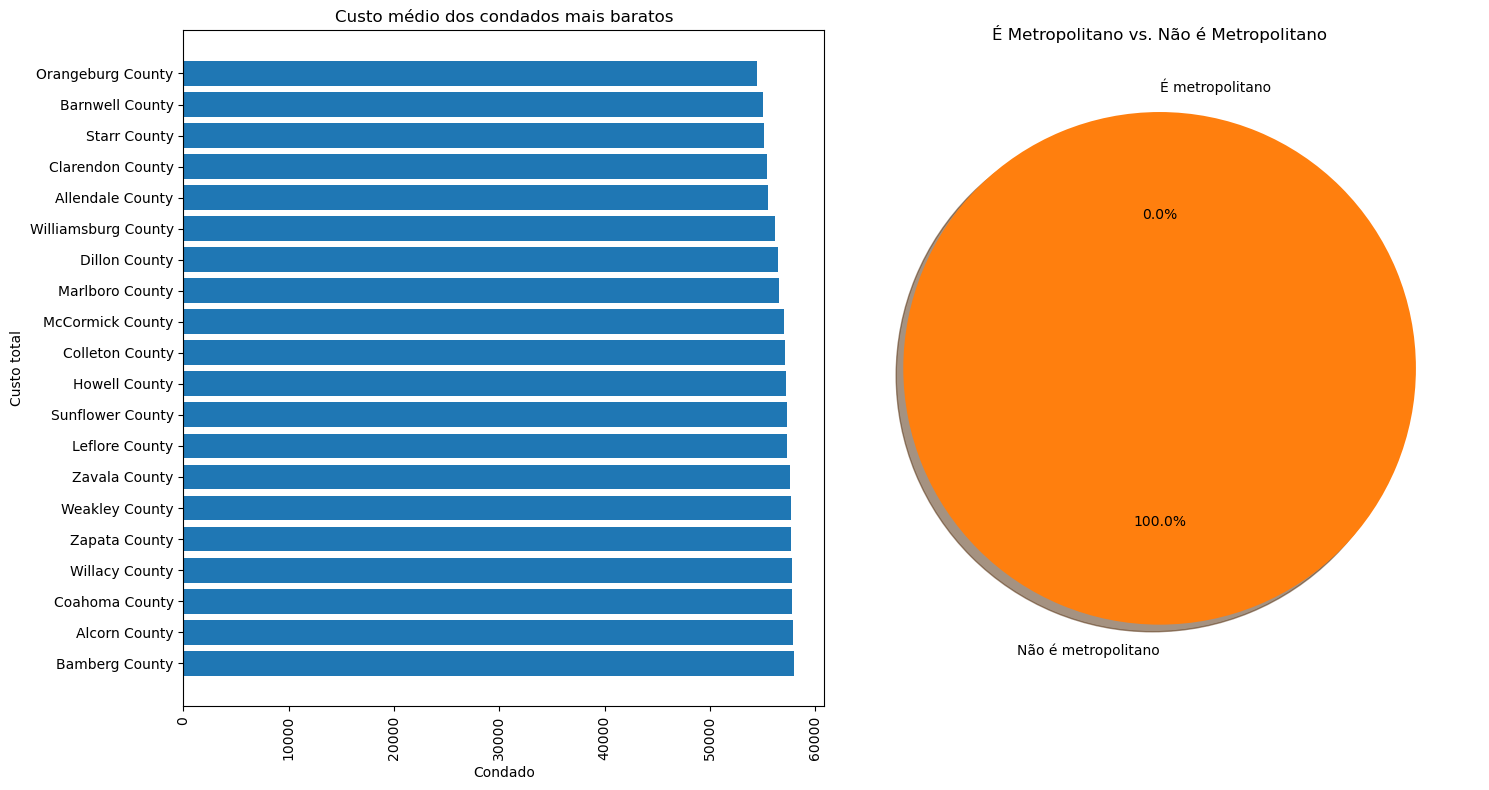

In [37]:
# Ordenando os condados por custo
dataBarato = df.groupby("county")[["total_cost", "isMetro"]].mean().reset_index().sort_values(by='total_cost', ascending=True)
dataBarato = dataBarato.head(20)
dataBarato = dataBarato.sort_values(by="total_cost", ascending=False)

# Criando um grid de subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Primeiro subplot
axes[0].barh(dataBarato['county'], dataBarato['total_cost'])
axes[0].set_title("Custo médio dos condados mais baratos")
axes[0].set_xlabel("Condado")
axes[0].set_ylabel("Custo total")
axes[0].tick_params(axis='x', rotation=90)

# Segundo subplot
df8 = dataBarato[dataBarato['isMetro'] == True]
eMetro = len(df8)
df9 = dataBarato[dataBarato['isMetro'] == False]
nMetro = len(df9)

labels = 'É metropolitano', 'Não é metropolitano'
axes[1].pie([eMetro, nMetro], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("É Metropolitano vs. Não é Metropolitano")

plt.tight_layout()
plt.show()

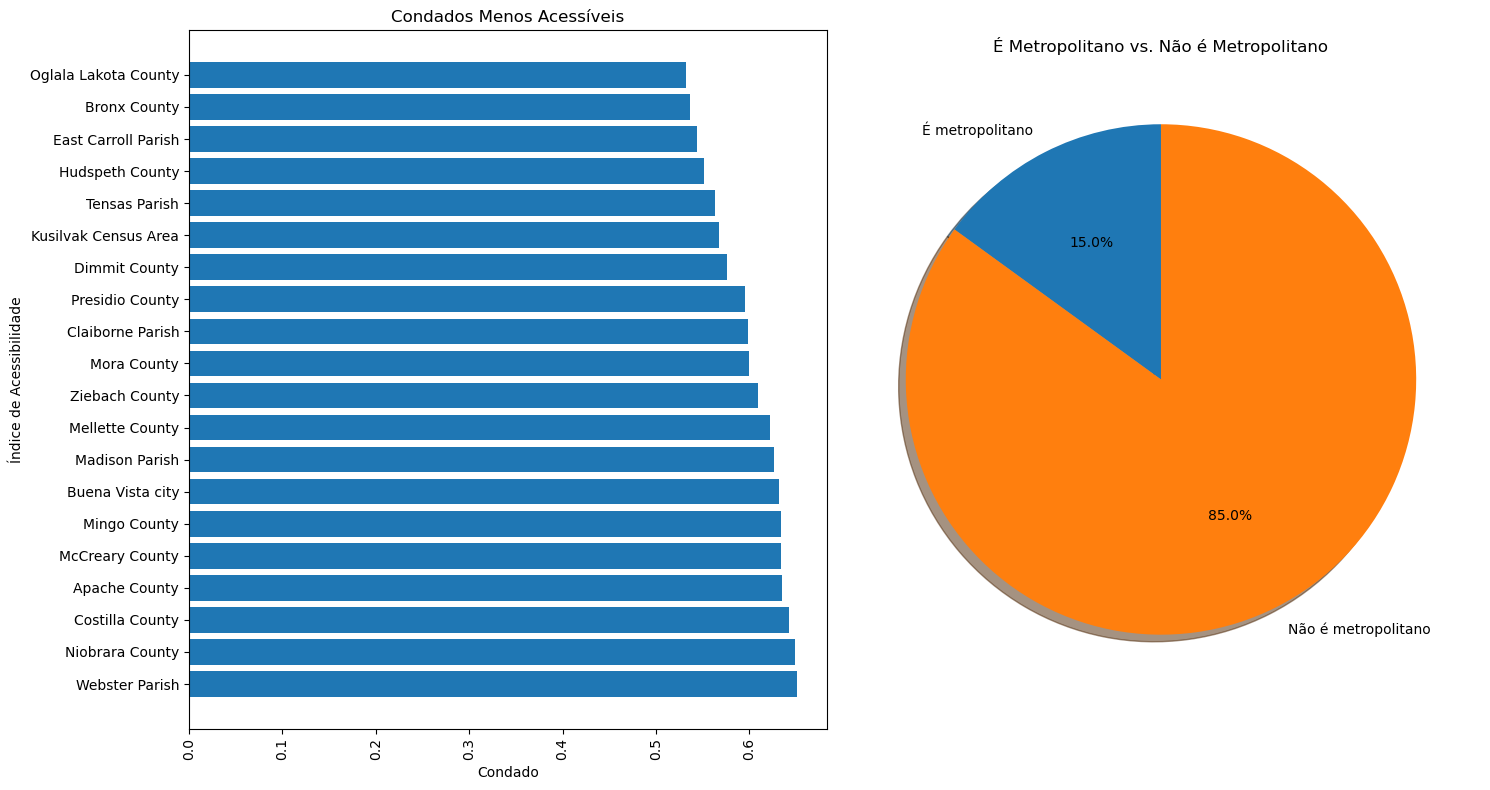

In [4]:
# Ordenando os condados por nível de acessibilidade
dataNAcess = df.groupby("county")[["affordability_index", 'isMetro']].mean().reset_index().sort_values(by='affordability_index', ascending=True)
dataNAcess = dataNAcess.head(20)
dataNAcess = dataNAcess.sort_values(by="affordability_index", ascending=False)

# Criando um grid de subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Primeiro subplot
axes[0].barh(dataNAcess['county'], dataNAcess['affordability_index'])
axes[0].set_title("Condados Menos Acessíveis")
axes[0].set_xlabel("Condado")
axes[0].set_ylabel("Índice de Acessibilidade")
axes[0].tick_params(axis='x', rotation=90)

# Segundo subplot
df6 = dataNAcess[dataNAcess['isMetro'] == True]
eMetro = len(df6)
df7 = dataNAcess[dataNAcess['isMetro'] == False]
nMetro = len(df7)

labels = 'É metropolitano', 'Não é metropolitano'
axes[1].pie([eMetro, nMetro], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("É Metropolitano vs. Não é Metropolitano")

plt.tight_layout()
plt.show()

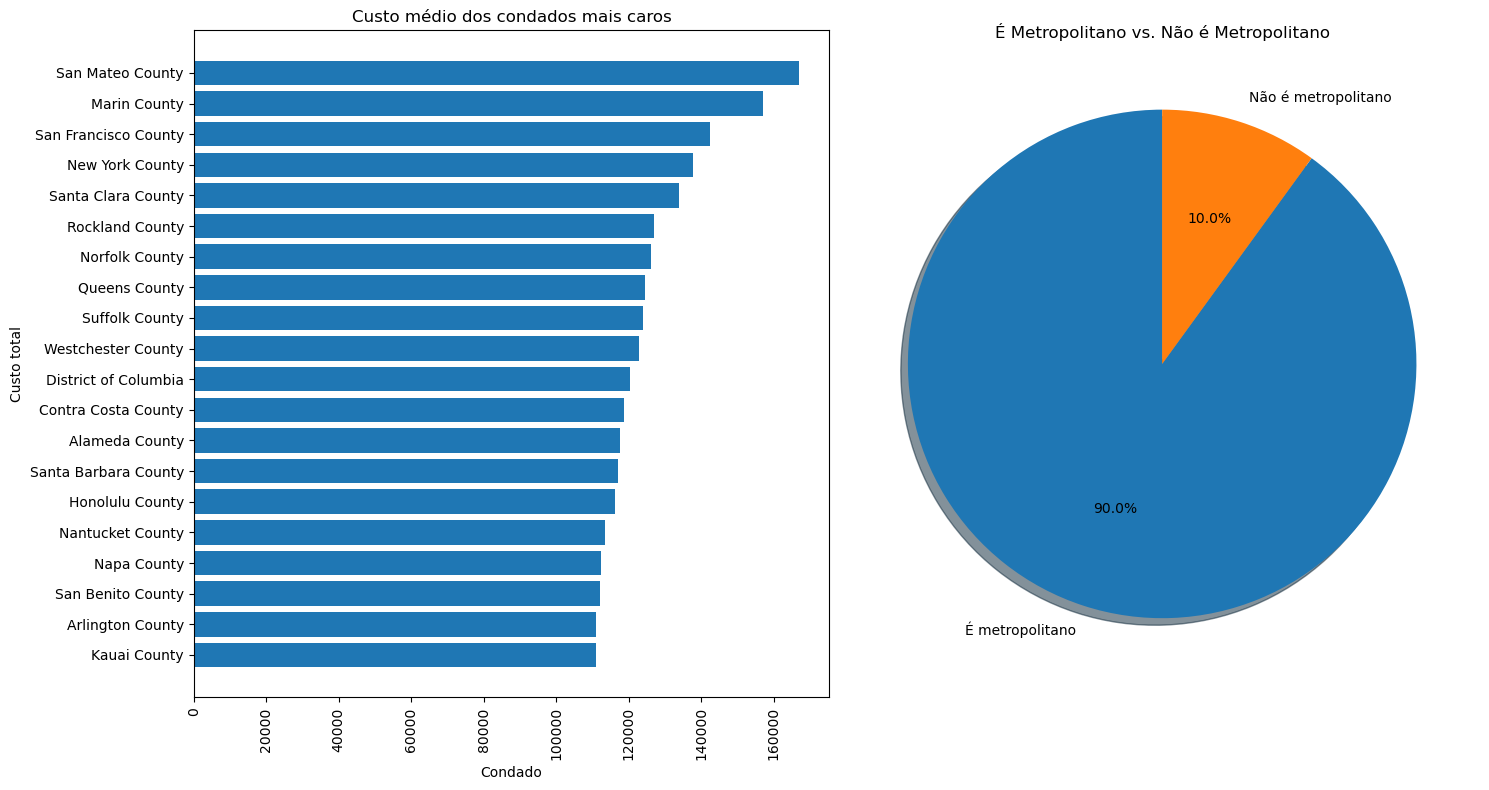

In [38]:
# Ordenando os condados por custo
dataCaro = df.groupby("county")[["total_cost", "isMetro"]].mean().reset_index().sort_values(by='total_cost', ascending=False)
dataCaro = dataCaro.head(20)
dataCaro = dataCaro.sort_values(by="total_cost", ascending=True)

# Criando um grid de subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Primeiro subplot
axes[0].barh(dataCaro['county'], dataCaro['total_cost'])
axes[0].set_title("Custo médio dos condados mais caros")
axes[0].set_xlabel("Condado")
axes[0].set_ylabel("Custo total")
axes[0].tick_params(axis='x', rotation=90)

# Segundo subplot
df10 = dataCaro[dataCaro['isMetro'] == True]
eMetro = len(df10)
df11 = dataCaro[dataCaro['isMetro'] == False]
nMetro = len(df11)

labels = 'É metropolitano', 'Não é metropolitano'
axes[1].pie([eMetro, nMetro], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("É Metropolitano vs. Não é Metropolitano")

plt.tight_layout()
plt.show()


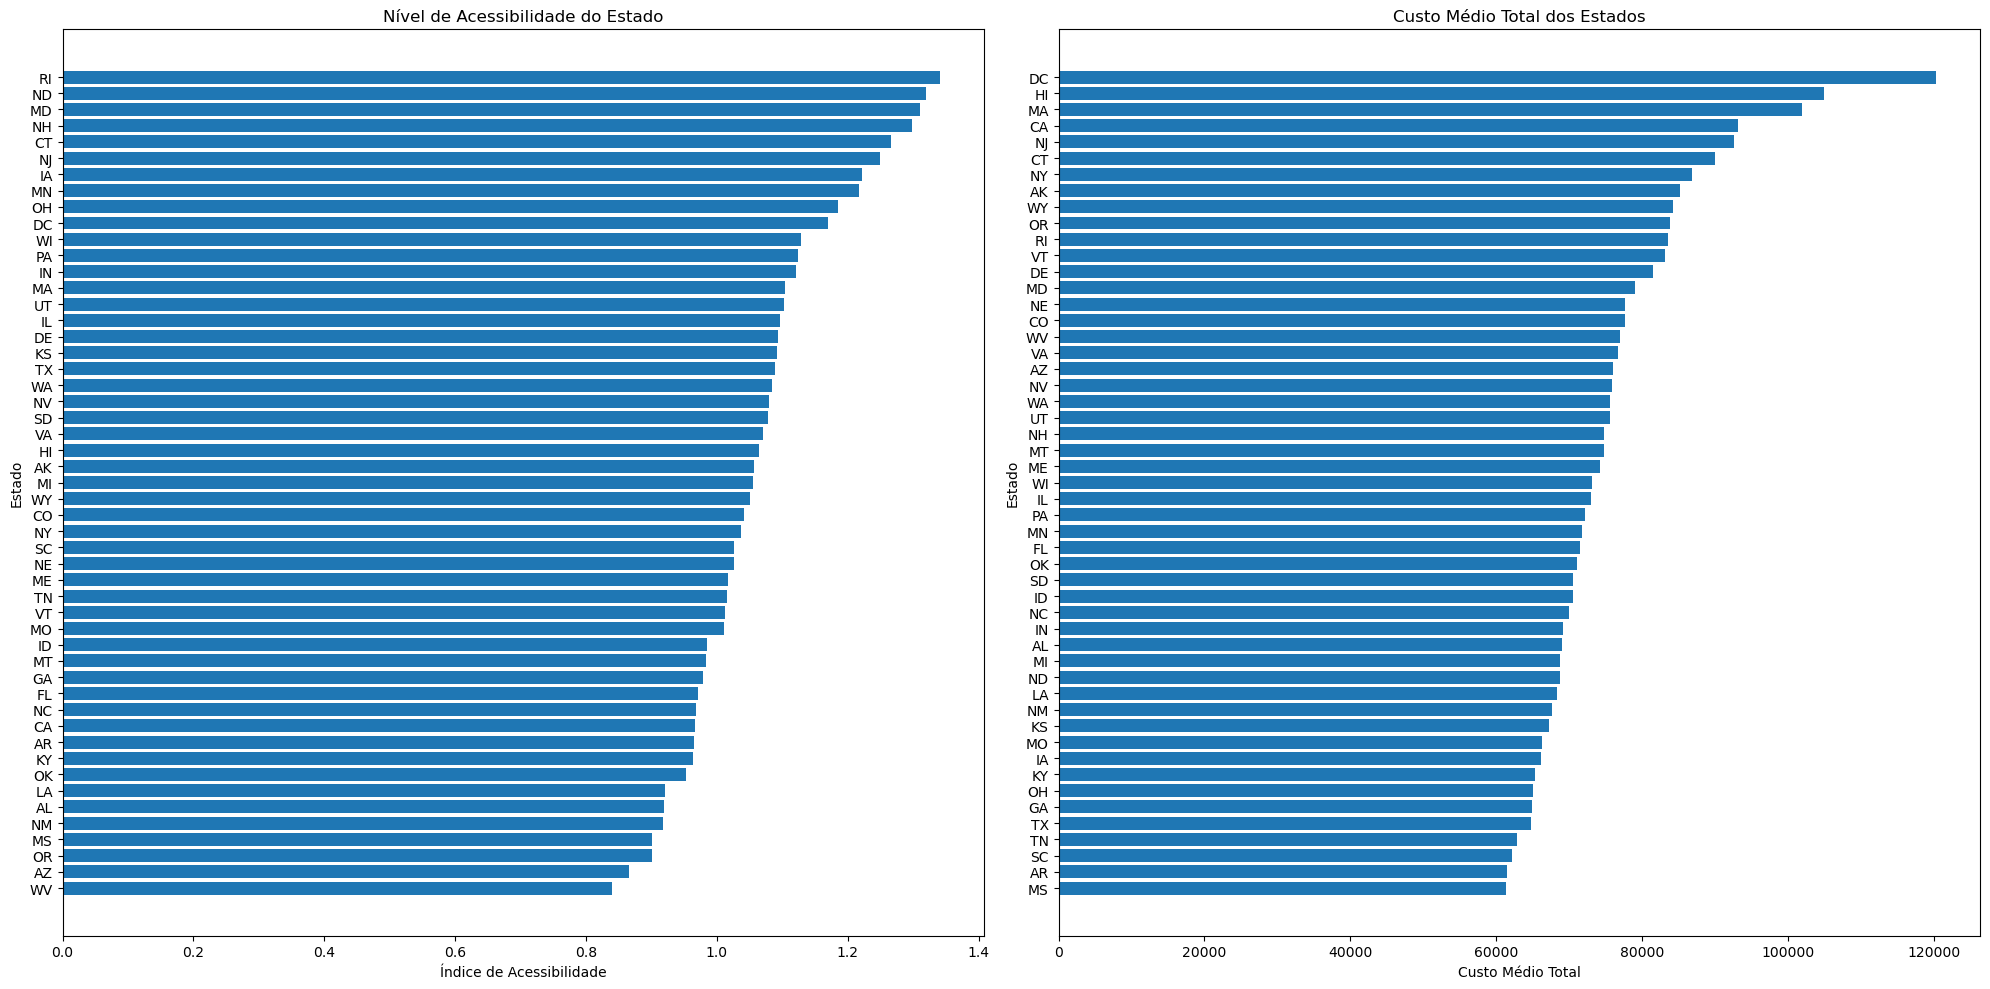

In [46]:
# Ordenando os estados pelo índice de acessibilidade
dataStateA = df.groupby("state")[["affordability_index"]].mean().reset_index().sort_values(by='affordability_index', ascending=True)

# Ordenando os estados pelo custo total
dataStateB = df.groupby("state")[["total_cost"]].mean().reset_index().sort_values(by='total_cost', ascending=True)

# Criando a figura e os subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Primeiro subplot: Índice de Acessibilidade
axes[0].barh(dataStateA['state'], dataStateA['affordability_index'])
axes[0].set_title("Nível de Acessibilidade do Estado")
axes[0].set_xlabel("Índice de Acessibilidade")
axes[0].set_ylabel("Estado")

# Segundo subplot: Custo Total
axes[1].barh(dataStateB['state'], dataStateB['total_cost'])
axes[1].set_title("Custo Médio Total dos Estados")
axes[1].set_xlabel("Custo Médio Total")
axes[1].set_ylabel("Estado")

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba o gráfico combinado
plt.show()

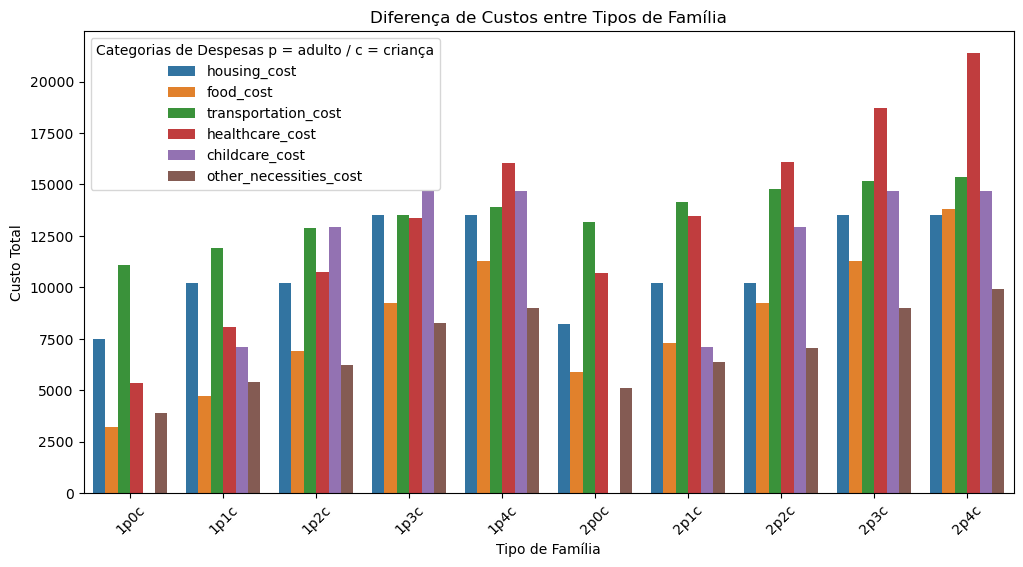

In [48]:
# Agrupe os dados por tipo de família e calcule o custo total para cada categoria
dados_agrupados = df.groupby("family_member_count")[["housing_cost", "food_cost", "transportation_cost", "healthcare_cost", "childcare_cost", "other_necessities_cost"]].mean().reset_index()

# Transforme os dados para visualização
dados_melted = pd.melt(dados_agrupados, id_vars="family_member_count", var_name="categoria_de_despesa", value_name="custo_total")

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="family_member_count", y="custo_total", hue="categoria_de_despesa", data=dados_melted)
plt.title("Diferença de Custos entre Tipos de Família")
plt.xlabel("Tipo de Família")
plt.ylabel("Custo Total")
plt.xticks(rotation=45)
plt.legend(title="Categorias de Despesas p = adulto / c = criança")
plt.show()

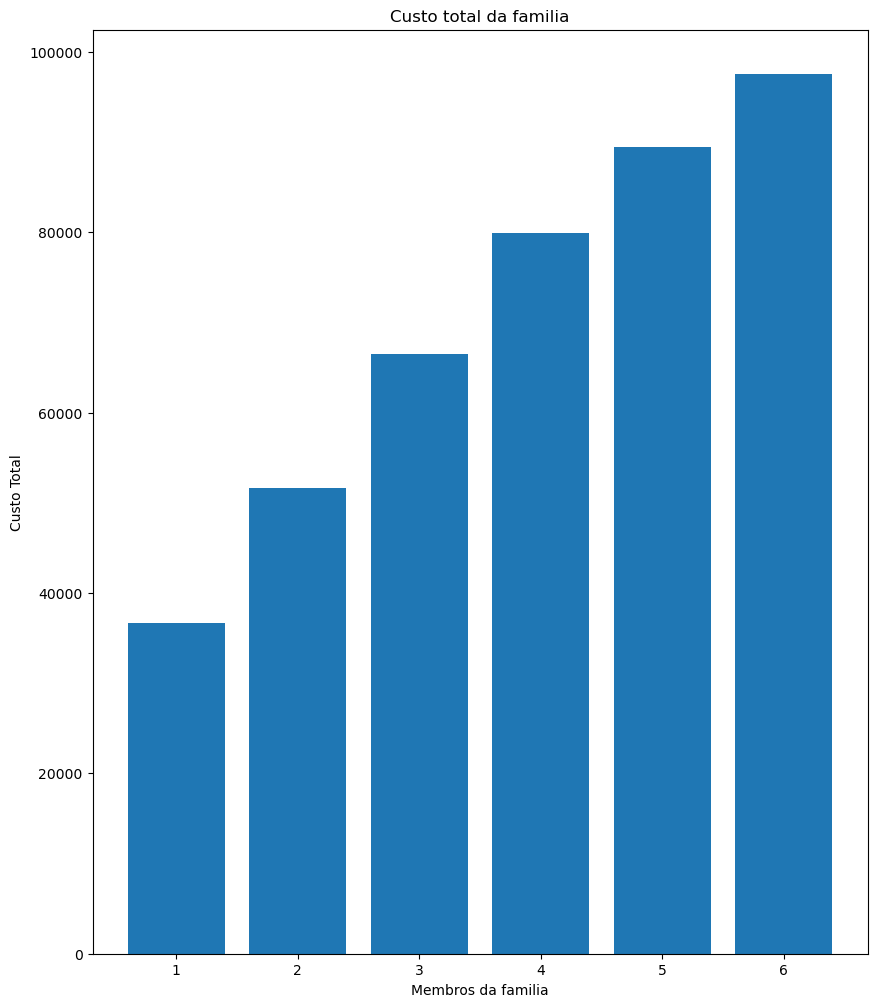

In [50]:
df['int_family_number_count'] = df["family_member_count"].apply(lambda x: int(x[0]) + int(x[2]))

grouped_budget_by_family_size = df.groupby("int_family_number_count")[["total_cost"]].mean().reset_index()

plt.figure(figsize=(10, 12))
plt.bar(grouped_budget_by_family_size['int_family_number_count'], grouped_budget_by_family_size['total_cost'])
plt.title("Custo total da familia")
plt.xlabel("Membros da familia")
plt.ylabel("Custo Total")
plt.show()

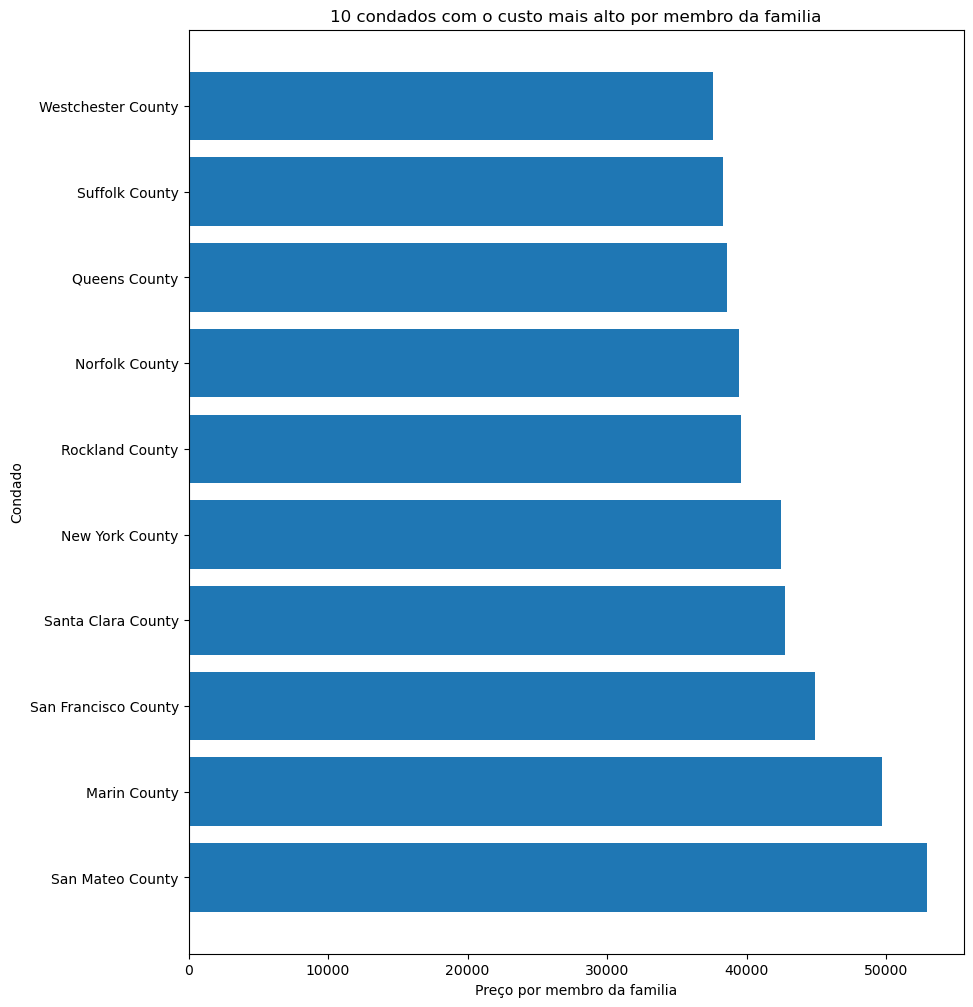

In [47]:
df['cost_per_family_member'] = df['total_cost'] / df['int_family_number_count']
grouped_counties_by_member_costs = df.groupby("county")[["cost_per_family_member"]].mean().reset_index()

sorted_counties = grouped_counties_by_member_costs.sort_values(ascending=False, by='cost_per_family_member').head(10)

plt.figure(figsize=(10, 12))
plt.barh(sorted_counties['county'], sorted_counties['cost_per_family_member'])
plt.title("10 condados com o custo mais alto por membro da familia")
plt.xlabel("Preço por membro da familia")
plt.ylabel("Condado")
plt.show()